## Regresión lineal y edad del universo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Datos bivariados

Hay muchos ejemplos en Ciencias de la Tierra y Planetarias en los que estamos interesados en la dependencia de un conjunto de datos sobre otro (_datos bivariados_). Hemos tratado estos escenarios hasta ahora al considerar la distancia de la última inversión geomagnética desde su dorsal oceánica para obtener la tasa de propagación del fondo marino y la diferencia en los tiempos de llegada de las ondas sísmicas $ P $ y $ S $ que está relacionada con la distancia de la fuente a el receptor.

Hoy nos centraremos en métodos que nos permitan investigar posibles asociaciones y relaciones entre variables. Y utilizando un problema clásico de la astrofísica para hacerlo. La inspiración para este ejercicio provino de la Lección 16 de la clase Python para estudiantes de Ciencias de la Tierra de Lisa Tauxe y parte del material se modificó a partir de esos materiales (https://github.com/ltauxe/Python-for-Earth-Science-Students).

### Edad del universo

Hoy, nos centraremos en utilizar la velocidad de alejamiento de las galaxias y las supernovas en función de su distancia (como se muestra en nuestro conjunto de datos de ejemplo). Estos datos son la base de lo que se conoce como "Ley de Hubble" (el mismo Hubble que para el telescopio Hubble). Hubble publicó estos resultados en 1929 [Hubble, E. P. (1929) Proc. Natl. Acad. Sci., 15, 168-173.] En ese momento, no estaba claro si el universo era estático o estaba expandiéndose o colapsando. Hubble planteó la hipótesis de que si el universo se estuviera expandiendo, entonces todo en él se alejaría de nosotros. Cuanto mayor sea la distancia entre la Tierra y la galaxia, más rápido deben irse moviendo. Así que todo lo que tenía que hacerse era medir la distancia y la velocidad de las galaxias distantes. Fácil, ¿verdad?.

Para medir la velocidad, Hubble utilizó el efecto Doppler. Para comprender cómo funciona esto, recuerde que el tono que escucha cuando se acerca una ambulancia cambia. Durante el efecto Doppler, el tono de la ambulancia cambia de agudo (a medida que se acerca) a bajo (a medida que se aleja). El tono cambia porque cambia la frecuencia relativa de las ondas sonoras. La frecuencia aumenta a medida que se acerca la ambulancia, lo que lleva a un tono más agudo, y luego disminuye a medida que se aleja, lo que resulta en un tono más bajo.

En caso de que no haya tenido esta experiencia de vida, escuchemos una sirena de este tipo aquí:

In [2]:
from IPython.display import HTML
HTML('<iframe width="704" height="493" src="https://www.youtube.com/embed/imoxDcn2Sgo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" </iframe>')

/Users/Catacdiaz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<img src="Images/Doppler_Effect.png" width=600>

El mismo principio se aplica a la luz, pero en lugar de escuchar un cambio en la frecuencia, observamos un cambio en la longitud de onda (el color) emitida por la galaxia. Si una estrella o galaxia se aleja de nosotros, sus bandas de absorción se desplazan hacia longitudes de onda más largas, el extremo rojo del espectro visible. Cuanto más rápido se aleje la estrella o galaxia del observador, mayor será el cambio hacia el rojo:

<img src="Images/dopp-redshift01.jpg" width=300>

Entonces, una estrella (o galaxia) que se aleja de nosotros tendrá un corrimiento hacia el rojo con la longitud de onda siendo extendida.


Hubble midió el desplazamiento hacia el rojo de diferentes galaxias y las convirtió en velocidades. Luego calculó la distancia a estos objetos, lo que es más difícil de hacer (por lo que estuvo bastante lejos de calcularlas).

La mejora de estos datos fue una de las principales motivaciones del telescopio espacial Hubble. Esos datos y la mejora continua de los enfoques para estimar estas distancias y velocidades e investigar tipos adicionales de objetos celestes es un enfoque importante de la investigación que actualmente esta siendo llevaba acabo por muchos investigadores.

## Datos de Supernovas del tipo 1a

Importemos datos de Freedman et al. (2000) de la distancia y la velocidad de retirada de supernovas de tipo 1a. Estas supernovas se describen como sigue en un artículo que Freedman escribió en 2010:

> One of the most accurate means of measuring cosmological distances out into the Hubble flow
utilizes the peak brightness of SNe Ia. The potential of supernovae for measuring distances was
clear to early researchers (e.g., Baade, Minkowski, Zwicky), but it was the Hubble diagram of
Kowal (1968) that set the modern course for this field, followed by decades of work by Sandage,
Tammann, and collaborators (e.g., Sandage & Tammann 1982, 1990; see also the review by
Branch 1998). Analysis by Pskovskii (1984), followed by Phillips (1993), established a correlation
between the magnitude of a SN Ia at peak brightness and the rate at which it declines, thus
allowing supernova luminosities to be “standardized.” This method currently probes farthest
into the unperturbed Hubble flow, and it possesses very low intrinsic scatter:
*Freedman and Madore (2010) who then go onto describe how using Cepheid variable stars (a type of pulsating star) has allowed for the distances to be better calibrated.*

> SNe Ia result from the thermonuclear runaway explosions of stars.
From observations alone, the presence of SNe Ia in elliptical galaxies suggests that they do not
come from massive stars. Many details of the explosion are not yet well understood, but the
generally accepted view is that of a carbon-oxygen, electron-degenerate, nearly-Chandrasekharmass
white dwarf orbiting in a binary system with a close companion *Freedman and Madore (2010)*

In [3]:
Supernova_data = pd.read_csv('Data/Freedman2000_Supernova1a.csv')
Supernova_data.tail()

,Supernova,VCMB,D(Mpc),HCMB,σ
31,SN1994T,10715,149.9,71.5,2.6
32,SN1995ac,14634,185.6,78.8,2.7
33,SN1995ak,6673,82.4,80.9,2.8
34,SN1996C,9024,136.0,66.3,2.5
35,SN1996bl,10446,132.7,78.7,2.7


La columna ```VCMB``` es la velocidad relativa al fondo cósmico de microondas en km s $ ^ {- 1} $. La columna ```D (Mpc)``` es la distancia en Mpc, que es la unidad que se utiliza normalmente para estas medidas. 1 Mpc = 3.09 x 10 $ ^ {19} $ km

Continúe y haga doble clic en esta celda para ver cómo obtengo etiquetas que tienen los superíndices adecuados.

Para crear etiquetas agradables con superíndices, podemos usar formato de látex, que también se puede hacer en una celda markdown. Para un superíndice, primero necesitamos encerrar el texto en signos de dólar y luego usar el símbolo ^ para convertir el siguiente texto en superíndice. Si hay más de un número en el superíndice, debe incluir lo que desee como superíndice entre llaves.
Por ejemplo, para imprimir $ 10 ^ 3 $, usamos `` `$ 10 ^ 3 $` `` y para 'por segundo' (s $ ^ {- 1} $): ```s $ ^ {- 1} $```

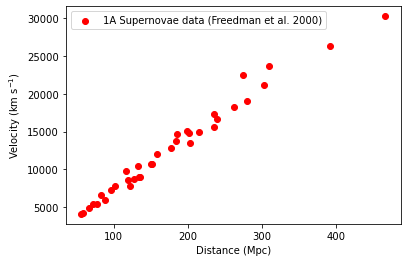

In [4]:
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

## Determinación de la pendiente de esta línea (la constante de Hubble)

Tenemos la distancia en el eje x en megaparsecs y la velocidad en el eje y en km / s. La pendiente de esta línea es la constante de Hubble:

$ v = H_o d $

donde $ v $ es la velocidad, $ d $ es la distancia y $ H_o $ es la constante de Hubble.

Esto se parece mucho a la ecuación para una línea que atraviesa los datos ($ y = mx + b $) donde $ m $ es la pendiente y $ b $ es la intersección con el eje y. En este caso, la intersección con el eje y debería ser 0 o casi, y $ m $ es $ H_o $.

Entonces, ¿cómo encontramos la pendiente?

Aquí es donde podemos usar la regresión lineal para encontrar la línea de "mejor ajuste" a través de los datos. El enfoque es minimizar la suma de los cuadrados de las distancias (residuales) entre los puntos y una línea que los atraviesa. En esta ilustración a continuación, los residuos son la distancia vertical entre cada punto de datos y la línea:

<img src = "Images/Residuals_for_Linear_Regression_Fit.png" width = 400>

El enfoque en la regresión lineal es encontrar la línea que minimiza el valor al cuadrado de todas estas distancias sumadas.

<img src = "Images/RMSE1.png" width = 400>
<img src = "Images/RMSE2.png" width = 400>
<img src = "Images/RMSE3.png" width = 400>
<img src = "Images/RMSE4.png" width = 400>

Determinamos la línea de mejor ajuste a través de este enfoque de mínimos cuadrados utilizando la función `` np.polyfit ()``. Una línea recta es un polinomio de primer grado (*tenga en cuenta que la función también puede ajustarse a polinomios de orden superior*).

In [5]:
np.polyfit?

## Ajustar una recta con `np.polyfit()`

`np.polyfit()` se puede utilizar para calcular las rectas de mejor ajuste (estableciendo el grado (```deg```) en 1), o curvas de orden superior (estableciendo el grado en 2 o más) devolviendo la pendiente y la intersección. Pongámoslo en uso:

In [6]:
np.polyfit(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],1)

array([ 67.5361857 , 711.79566787])

Entonces $H_o$, la pendiente que tiene el mejor ajuste, es 67.5 (en la rara unidad de kilómetros por segundo por megaparsec).

Tracemos la línea de mejor ajuste en nuestro gráfico.

Podemos asignar la pendiente y la intersección y mejor ajustadas de **np.polyfit()** a una variable (**m_b**).

In [7]:
m_b= np.polyfit(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],1)
print(m_b) #see if that worked

[ 67.5361857  711.79566787]


In [8]:
model_y_values = np.polyval(m_b,Supernova_data['D(Mpc)'])
model_y_values

array([ 9808.91988211, 11443.29557612, 14124.48214855, 16846.19043239,
        8620.28301373,  4493.82206726, 13131.70021871,  8917.44223082,
       19257.23226199,  7607.24022818,  4628.89443866, 32251.19439131,
       18419.78355927,  6695.50172118, 10936.77418335, 14387.87327279,
       16643.58187528, 12652.19330021,  5972.86453416, 21614.24514304,
       27152.21237071, 19628.68128336, 21202.27441025, 16657.08911242,
       15259.09006836,  8795.87709656, 14374.36603565,  5560.89380137,
        7242.54482538,  9342.92020075,  5223.21287285, 10835.4699048 ,
       13246.5117344 ,  6276.77736982,  9896.71692352,  9673.8475107 ])

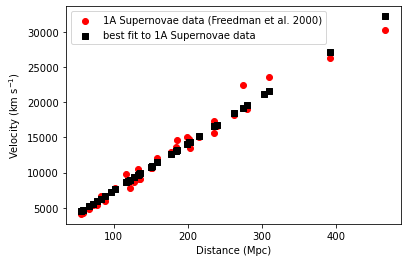

In [9]:
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],
            color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.scatter(Supernova_data['D(Mpc)'],model_y_values,
         color='black',marker='s',label='best fit to 1A Supernovae data')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

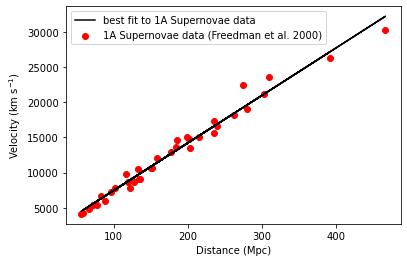

In [10]:
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],
            color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.plot(Supernova_data['D(Mpc)'],model_y_values,
         color='black',label='best fit to 1A Supernovae data')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

## Usando este modelo lineal para la predicción

¿Cuál sería la predicción de la velocidad de una supernova que resultó ser de 350 Mpc?

<font color = goldenrod> **_Código para que escriba_**</font>
y=67.5361857*350+711.79566787

**Utilice la función ``np.polyval()`` para llegar a lo que el modelo lineal predice cuál sería la velocidad**

In [43]:
y=67.5361857*350+711.79566787
print('predicción velocidad:',y)

predicción velocidad: 24349.460662870002


In [11]:
m_b= np.polyfit(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],1)
velocidad = np.polyval(m_b,350 )
velocidad

24349.460664022234

## Evaluación del ajuste del modelo

También nos gustaría saber quién se ajusta bien este modelo a nuestros datos (es decir, qué tan correlacionados están los datos). Usaremos el coeficiente de correlación $R^{2} $ para esto. $R^ {2}$ es cero para datos no correlacionados y 1 para datos perfectamente lineales (por lo que no hay desajuste entre la línea del modelo y los datos). Usaremos la función scipy `stats.linregress` para calcular  $R^{2}$.

In [12]:
from scipy.stats import stats

Y utilícelo para obtener lo que normalmente se llama el valor $ R ^ 2 $, que cuando 1. represente una concordancia perfecta.

<img src = "Images/Correlation_examples.svg" width = 900>
> Coeficiente de correlación de Pearson entre varios conjuntos de ejemplos X, Y. Fuente: https://en.wikipedia.org/wiki/Correlation_and_dependence

In [13]:
stats.linregress(Supernova_data['D(Mpc)'],Supernova_data['VCMB'])

LinregressResult(slope=67.5361857032834, intercept=711.7956678730352, rvalue=0.9890793847199012, pvalue=7.32480214659252e-30, stderr=1.725899617363687)

In [14]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Supernova_data['D(Mpc)'],Supernova_data['VCMB'])

In [15]:
rvalue**2

0.9782780292778983

## Evaluación del ajuste mediante el trazado de residuos

Para ver qué tan bien funciona la regresión, el científico de datos debe medir qué tan lejos están las estimaciones de los valores reales. Estas diferencias se denominan *residuales*.

$$
\mbox {residual} ~ = ~ \mbox {valor observado} ~ - ~ \mbox {estimacion de regresion}
$$

Un residuo es lo que queda después de la estimación.

Los residuos son las distancias verticales de los puntos desde la línea de regresión. Hay un residuo para cada punto del gráfico de dispersión. El residual es la diferencia entre el valor observado de $ y $ y el valor ajustado de $ y $, por lo que para el punto $ (x, y) $,

$$
\mbox{residual} ~~ = ~~ y ~ - ~
\mbox{valor ajustado de } y
~~ = ~~ y ~ - ~
\mbox{altura de la recta de regresion en } x
$$

In [19]:
residual = Supernova_data['VCMB']-model_y_values

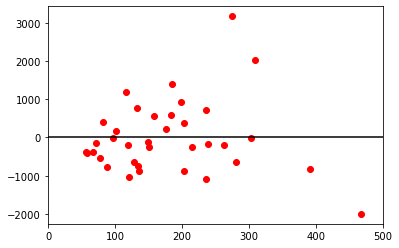

In [21]:
plt.scatter(Supernova_data['D(Mpc)'],residual,color='red')
plt.hlines(0,xmin=0,xmax=500)
plt.xlim(0,500)
plt.show()

**El gráfico residual de una buena regresión no muestra ningún patrón. Los residuos se ven casi iguales, por encima y por debajo de la línea horizontal en 0, en todo el rango de la variable predictora.**

## Estimando la edad del universo

Para calcular la edad del universo, podemos usar la ley de Hubble:

Teníamos $ v = H_o d $ como la ley de Hubble y sabemos que distancia = velocidad x tiempo, o $ d = vt $. Entonces, si dividimos ambos lados por $ v $ y obtenemos:

1 = $H_o$ t.

Resolviendo para $t$ (la edad del universo), obtenemos

$ t = 1 / H_o $ [en algunas unidades extrañas]

In [22]:
t = 1.0/slope
print(t)

0.014806877077622451


Pero las unidades son raras (no años, Mpc s / km). Para solucionar este problema, necesitamos saber cuántos kilómetros hay en un megaparsec. Da la casualidad de que hay 3,09 x 10 $ ^ {19} $ km / Mpc.

Entonces, podemos calcular la edad del universo en segundos (** Age_sec **) convirtiendo los megaparsecs a km:

Edad en segundos = $t\frac{s \cdot Mpc}{km}$ x $3.09 x 10 ^ {19} \frac{km}{Mpc}$

In [23]:
Age_sec=t*3.09e19
print(Age_sec)

4.5753250169853376e+17


¡Son muchos segundos! Deberíamos convertir segundos en años. Aquí hay otro dato divertido: hay aproximadamente $ \pi $ x 10 $ ^ 7 $ segundos en un año.

Más precisamente, hay 60 (s / min) x 60 (min / h) x 24 (h / día) x 365,25 (días / año)

In [24]:
s_yr=60*60*24*365.25
print('%e'%(s_yr))

3.155760e+07


Ok.  No exactamente $\pi \times 10^7$, pero cerca...

In [25]:
Age_yrs=Age_sec/s_yr
print(Age_yrs)

14498330091.595488


y ahora en miles de millones de años

In [26]:
print ('Edad del universo (en miles de millones de años):')
print(Age_yrs*1e-9)

Edad del universo (en miles de millones de años):
14.498330091595488


<font color = goldenrod> **_Código para que escriba_** </font>

**Escribe una función que tome un valor constante de Hubble y calcule la edad del Universo en miles de millones de años**

In [28]:
def age_of_universe(Hubble_constant):
    t = 1.0/Hubble_constant
    Age_sec=t*3.09e19
    s_yr=60*60*24*365.25
    age=Age_sec/s_yr
    
    return age

#ejemplo
print(age_of_universe(80))

12239523918.168682


## Usar otros conjunto de datos para estimar la constante de Hubble

La determinación de la constante de Hubble sigue siendo una importante vía de investigación astrofísica. De hecho, el grupo de investigación de Wendy Freedman acaba de publicar un nuevo estudio (https://arxiv.org/abs/1907.05922) que se resume en este breve video:

https://www.youtube.com/watch?v=awcnVykOKZY

De ese documento, aquí hay una visualización de las determinaciones constantes de Hubble durante los últimos 18 años:

<img src = "Images/Hubble_Constant_Time.png" width = 600>

Veamos otro conjunto de datos del estudio de 2000 para ver cómo diferentes conjuntos de datos pueden conducir a diferentes respuestas.

## Datos de las galaxias Tully-Fisher (TF)
> The total luminosity of a spiral galaxy (corrected to face-on inclination to account for extinction)
is strongly correlated with the galaxy’s maximum (corrected to edge-on inclination) rotation
velocity. This relation, calibrated via the Leavitt Law or TRGB, becomes a powerful means of determining
extragalactic distances (Tully&Fisher 1977, Aaronson et al. 1986, Pierce&Tully 1988,
Giovanelli et al. 1997). The TF relation at present is one of the most widely applied methods for
distance measurements *Freedman and Madore (2010)*

<font color = goldenrod> **Código para que escriba** </font>

**Importe el archivo 'Data/Freedman2000_IBandTullyFisher.csv'. Realice un ajuste lineal para determinar la pendiente entre "VCMB" y "D (Mpc)". Calcule la edad implícita del universo solo a partir de estos datos de galaxias tipo TF.**

In [29]:
galaxiesTF_data = pd.read_csv('Data/Freedman2000_IBandTullyFisher.csv')
galaxiesTF_data.head()

,Cluster/Group,VCMB,VFlow,σ,D(Mpc),HCMB,σ.1,HFlow,σ.2
0,Abell 1367,6709,6845,88,89.2,75.2,12.5,76.7,12.8
1,Abell 0262,4730,5091,80,66.7,70.9,11.8,76.2,12.7
2,Abell 2634,8930,9142,79,114.9,77.7,12.4,79.6,12.7
3,Abell 3574,4749,4617,11,62.2,76.2,12.2,74.2,11.9
4,Abell 0400,7016,6983,75,88.4,79.3,12.6,79.0,12.6


### Cuando los datos son curvos.

Como ejemplo de una relación curva, hay nuevos datos disponibles para el problema clásico de Hubble. Encontré uno publicado por Betoule et al. en 2014 [http://dx.doi.org/10.1051/0004-6361/201423413](http://dx.doi.org/10.1051/0004-6361/201423413). En este artículo, los datos se grafican utilizando los parámetros $ z $ y $\mu$ que están relacionados con la velocidad y la distancia de desplazamiento al rojo. $ z $ es el cambio fraccional en la longitud de onda espectral y $ \mu $ está relacionado con la distancia.

Aquí hay un gráfico del artículo de Betoule et al.:

<img src = "Images/betoule14.png" width = 600> _[Figura de Betoule et al., 2014.] Estos datos son supernova de tipo Ia de diferentes grupos de colaboradores de este artículo_

Observe que trazaron los datos en una escala logarítmica. (Esto esconde algunas cosas sorprendentes).

Resulta que hemos estado mirando datos que son de bajo z (es decir, un desplazamiento al rojo relativamente cercano y bajo). Necesitamos convertir $ z $ y $ \mu $ a distancia y velocidad para compararlos con los resultados que hemos considerado hasta ahora.

Según [http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/hubble.html](http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/hubble.html)

la velocidad $ v $ (como fracción de la velocidad de la luz, $ c $) viene dada por

$ {v \over c} = \bigl ({{(z + 1) ^ 2-1} \over {(z + 1) ^ 2 + 1}} \bigr) $

donde $ c = 3 \times 10 ^ 8 $ m s $ ^ {- 1} $.

Y según Betoule et al. (2014) paper, $ \mu $ se relaciona con la distancia en parsecs $ d $ así:

$ \mu = 5 \log (d / 10) $.

Leamos los datos (disponibles en este sitio web: http://cdsarc.u-strasbg.fr/viz-bin/qcat?J/A+A/568/A22#sRM2.2), que son promedios de los datos que se muestra en la figura anterior y eche un vistazo.

In [30]:
Betoule_data = pd.read_csv('Data/mu_z.csv',header=1)
Betoule_data.head()

,z,mu
0,0.010,32.953887
1,0.012,33.879003
2,0.014,33.842141
3,0.016,34.118567
4,0.019,34.593446


Ahora podemos trazarlo de la misma manera que lo hicieron los cosmólogos en el artículo, usando $\mu $ y $ \log z$:

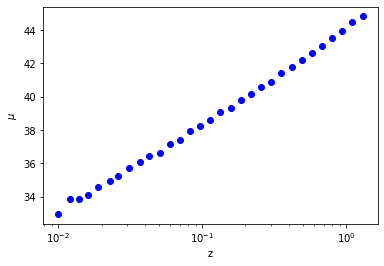

In [31]:
plt.scatter(Betoule_data['z'],Betoule_data['mu'],color='blue')
plt.xlabel('z')
plt.ylabel('$\mu$')
plt.semilogx()
plt.show()

Para comparar estos nuevos datos con los datos considerados anteriormente, debemos hacer lo siguiente:

- Transforma $z$ en velocidad
- Transforma $\mu$ a distancia usando las ecuaciones proporcionadas.
- Truncar el nuevo conjunto de datos que va a distancias mucho más lejanas que el conjunto de datos 'antiguo'

In [35]:
c = 2.9979e8 / 1000 # speed of light in km/s
Betoule_data['velocity'] = c * (((Betoule_data['z']+1.)**2-1.)/((Betoule_data['z']+1.)**2+1.)) # the formula for v from z (and c)
Betoule_data['distance']=10000*(10.**((Betoule_data['mu'])/5.))*1e-9 # convert mu to Gpc

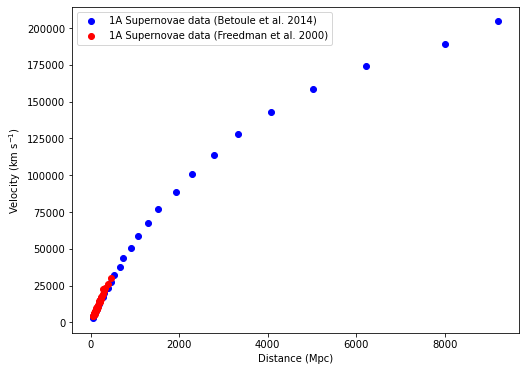

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'],
         color='blue',label='1A Supernovae data (Betoule et al. 2014)')
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],
            color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

Estos conjuntos de datos son similares entre sí para los objetos "cercanos", pero podemos ver que un modelo lineal no funciona bien para objetos que se encuentran a mayores distancias.

Para visualizar esta realidad, grafiquemos el ajuste a los datos de Freedman et al. 2000 encima de esta gráfica (aplicándolos a las distancias de Betoule usando `np.polyval ()`.

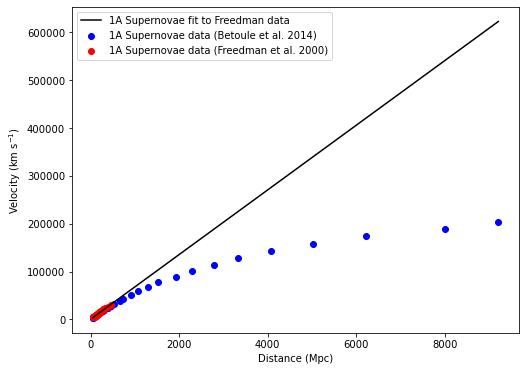

In [38]:
model_y_values = np.polyval(m_b,Betoule_data['distance'])

plt.figure(figsize=(8,6))
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'],
         color='blue',label='1A Supernovae data (Betoule et al. 2014)')
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],
            color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.plot(Betoule_data['distance'],model_y_values,
         color='black',label='1A Supernovae fit to Freedman data')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

Claramente, este ajuste es bastante pobre.

Hagamos un ajuste polinomial de primer orden a todos los datos de Betoule y luego grafiquemos el residuo:

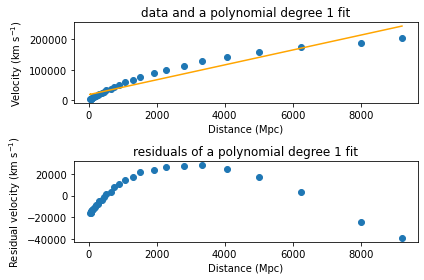

In [39]:
fit = np.polyfit(Betoule_data['distance'],Betoule_data['velocity'],1) 
y_values = np.polyval(fit,Betoule_data['distance'])

plt.subplot(2,1,1)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'])
plt.plot(Betoule_data['distance'],y_values,color='orange',)
plt.title('data and a polynomial degree 1 fit')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.subplot(2,1,2)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity']-y_values)
plt.title('residuals of a polynomial degree 1 fit')
plt.ylabel('Residual velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.tight_layout()
plt.show()

Hay mucha estructura en el residuo de este ajuste de grado 1. Probemos un ajuste polinomial de grado 2 (conocido como cuadrático):

$f(x) = ax ^ 2 + bx + c$

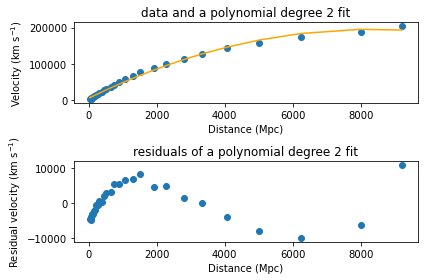

In [40]:
fit = np.polyfit(Betoule_data['distance'],Betoule_data['velocity'],2) 
y_values = np.polyval(fit,Betoule_data['distance'])

plt.subplot(2,1,1)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'])
plt.plot(Betoule_data['distance'],y_values,color='orange',)
plt.title('data and a polynomial degree 2 fit')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.subplot(2,1,2)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity']-y_values)
plt.title('residuals of a polynomial degree 2 fit')
plt.ylabel('Residual velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.tight_layout()
plt.show()

Hay mucha estructura en los residuos de este ajuste de grado 2 (y los residuos siguen siendo altos). Probemos un ajuste polinomial de grado 3 (conocido como cúbico):

$ f (x) = ax ^ 3 + bx ^ 2 + cx + d $

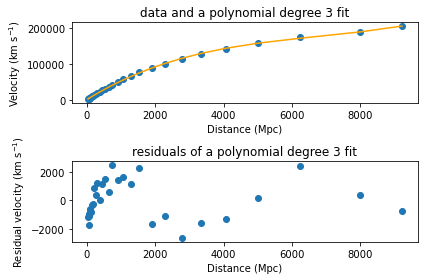

In [41]:
fit = np.polyfit(Betoule_data['distance'],Betoule_data['velocity'],3) 
y_values = np.polyval(fit,Betoule_data['distance'])

plt.subplot(2,1,1)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'])
plt.plot(Betoule_data['distance'],y_values,color='orange',)
plt.title('data and a polynomial degree 3 fit')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.subplot(2,1,2)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity']-y_values)
plt.title('residuals of a polynomial degree 3 fit')
plt.ylabel('Residual velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.tight_layout()
plt.show()

¿Puede funcionar mejor un ajuste polinomial de grado 4?

$ f (x) = ax ^ 4 + bx ^ 3 + cx ^ 2 + dx + e $

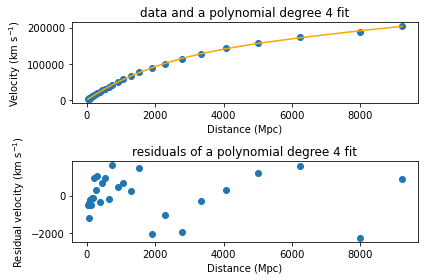

In [42]:
fit = np.polyfit(Betoule_data['distance'],Betoule_data['velocity'],4) 
y_values = np.polyval(fit,Betoule_data['distance'])

plt.subplot(2,1,1)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'])
plt.plot(Betoule_data['distance'],y_values,color='orange',)
plt.title('data and a polynomial degree 4 fit')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.subplot(2,1,2)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity']-y_values)
plt.title('residuals of a polynomial degree 4 fit')
plt.ylabel('Residual velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.tight_layout()
plt.show()

Eso se ve más o menos igual que el cúbico, por lo que también podría seguir con ese como modelo de trabajo.

El hecho de que la relación velocidad-distancia no sea lineal se toma como evidencia de que la expansión del universo se está acelerando. Esta aceleración se atribuye a la energía oscura:
    
> In a matter-dominated universe, the expansion velocity of the Universe slows down over
time owing to the attractive force of gravity. However, a decade ago two independent groups (Perlmutter et al. 1999, Riess et al. 1998) found that supernovae at z ∼ 0.5 appear to be about 10%
fainter than those observed locally, consistent instead with models in which the expansion velocity
is increasing; that is, a universe that is accelerating in its expansion. Combined with independent
estimates of the matter density, these results are consistent with a universe in which one-third of
the overall density is in the form of matter (ordinary plus dark), and two-thirds is in a form having
a large, negative pressure, termed dark energy.